In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import pandas as pd

# Define column specifications (start and end positions for each column)
colspecs = [
    (0, 4),    # HR number
    (4, 14),   # Name
    (14, 25),  # DM number
    (25, 31),  # HD number
    (31, 37),  # SAO number
    (37, 41),  # FK5
    (41, 42),  # IR flag
    (42, 43),  # r_IR flag
    (43, 44),  # Multiple star code
    (44, 49),  # ADS
    (49, 51),  # ADS component
    (51, 60),  # VarID
    (60, 62),  # RAh1900
    (62, 64),  # RAm1900
    (64, 68),  # RAs1900
    (68, 69),  # DE-1900
    (69, 71),  # DEd1900
    (71, 73),  # DEm1900
    (73, 75),  # DEs1900
    (75, 77),  # RAh
    (77, 79),  # RAm
    (79, 83),  # RAs
    (83, 84),  # DE-
    (84, 86),  # DEd
    (86, 88),  # DEm
    (88, 90),  # DEs
    (90, 96),  # GLON
    (96, 102), # GLAT
    (102, 107),# Vmag
    (107, 108),# n_Vmag
    (108, 109),# u_Vmag
    (109, 114),# B-V
    (114, 115),# u_B-V
    (115, 120),# U-B
    (120, 121),# u_U-B
    (121, 126),# R-I
    (126, 127),# n_R-I
    (127, 147),# SpType
    (147, 148),# n_SpType
    (148, 154),# pmRA
    (154, 160),# pmDE
    (160, 161),# n_Parallax
    (161, 166),# Parallax
    (166, 170),# RadVel
    (170, 174),# n_RadVel
    (174, 176),# l_RotVel
    (176, 179),# RotVel
    (179, 180),# u_RotVel
    (180, 184),# Dmag
    (184, 190),# Sep
    (190, 194),# MultID
    (194, 196),# MultCnt
    (196, 197) # NoteFlag
]

column_descriptions = {
    'HR': "[1/9110]+ Harvard Revised Number = Bright Star Number",
    'Name': "Name, generally Bayer and/or Flamsteed name",
    'DM': "Durchmusterung Identification (zone in bytes 17-19)",
    'HD': "[1/225300]? Henry Draper Catalog Number",
    'SAO': "[1/258997]? SAO Catalog Number",
    'FK5': "? FK5 star Number",
    'IR_flag': "[I] I if infrared source",
    'r_IR_flag': "[ ':] Coded reference for infrared source",
    'Multiple': "[AWDIRS] Double or multiple-star code",
    'ADS': "Aitken's Double Star Catalog (ADS) designation",
    'ADScomp': "ADS number components",
    'VarID': "Variable star identification",
    'RAh1900': "?Hours RA, equinox B1900, epoch 1900.0",
    'RAm1900': "?Minutes RA, equinox B1900, epoch 1900.0",
    'RAs1900': "?Seconds RA, equinox B1900, epoch 1900.0",
    'DE-1900': "?Sign Dec, equinox B1900, epoch 1900.0",
    'DEd1900': "?Degrees Dec, equinox B1900, epoch 1900.0",
    'DEm1900': "?Minutes Dec, equinox B1900, epoch 1900.0",
    'DEs1900': "?Seconds Dec, equinox B1900, epoch 1900.0",
    'RAh': "?Hours RA, equinox J2000, epoch 2000.0",
    'RAm': "?Minutes RA, equinox J2000, epoch 2000.0",
    'RAs': "?Seconds RA, equinox J2000, epoch 2000.0",
    'DE-': "?Sign Dec, equinox J2000, epoch 2000.0",
    'DEd': "?Degrees Dec, equinox J2000, epoch 2000.0",
    'DEm': "?Minutes Dec, equinox J2000, epoch 2000.0",
    'DEs': "?Seconds Dec, equinox J2000, epoch 2000.0",
    'GLON': "?Galactic longitude",
    'GLAT': "?Galactic latitude",
    'Vmag': "?Visual magnitude",
    'n_Vmag': "[ HR] Visual magnitude code",
    'u_Vmag': "[ :?] Uncertainty flag on V",
    'B-V': "? B-V color in the UBV system",
    'u_B-V': "[ :?] Uncertainty flag on B-V",
    'U-B': "? U-B color in the UBV system",
    'u_U-B': "[ :?] Uncertainty flag on U-B",
    'R-I': "? R-I in system specified by n_R-I",
    'n_R-I': "[CE:?D] Code for R-I system (Cousin, Eggen)",
    'SpType': "Spectral type",
    'n_SpType': "[evt] Spectral type code",
    'pmRA': "?Annual proper motion in RA J2000, FK5 system",
    'pmDE': "?Annual proper motion in Dec J2000, FK5 system",
    'n_Parallax': "[D] D indicates a dynamical parallax, otherwise a trigonometric parallax",
    'Parallax': "? Trigonometric parallax (unless n_Parallax)",
    'RadVel': "? Heliocentric Radial Velocity",
    'n_RadVel': "[V?SB123O ] Radial velocity comments",
    'l_RotVel': "[<=> ] Rotational velocity limit characters",
    'RotVel': "? Rotational velocity, v sin i",
    'u_RotVel': "[ :v] Uncertainty and variability flag on RotVel",
    'Dmag': "? Magnitude difference of double, or brightest multiple",
    'Sep': "? Separation of components in Dmag if occultation binary",
    'MultID': "Identifications of components in Dmag",
    'MultCnt': "? Number of components assigned to a multiple",
    'NoteFlag': "[*] a star indicates that there is a note (see file notes)"
}

# Define the column names corresponding to the colspecs
column_names = [
    'HR', 'Name', 'DM', 'HD', 'SAO', 'FK5', 'IR_flag', 'r_IR_flag', 'Multiple',
    'ADS', 'ADScomp', 'VarID', 'RAh1900', 'RAm1900', 'RAs1900', 'DE-1900',
    'DEd1900', 'DEm1900', 'DEs1900', 'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm',
    'DEs', 'GLON', 'GLAT', 'Vmag', 'n_Vmag', 'u_Vmag', 'B-V', 'u_B-V', 'U-B',
    'u_U-B', 'R-I', 'n_R-I', 'SpType', 'n_SpType', 'pmRA', 'pmDE', 'n_Parallax',
    'Parallax', 'RadVel', 'n_RadVel', 'l_RotVel', 'RotVel', 'u_RotVel', 'Dmag',
    'Sep', 'MultID', 'MultCnt', 'NoteFlag'
]

# Load the file
df = pd.read_fwf('bsc5.dat', colspecs=colspecs, names=column_names)

# remove invisible stars
df = df[~(df['IR_flag'].isna() | df['Vmag'].isna())]

# remove stars without parallax
df = df[~df['Parallax'].isna()]

In [4]:
# check: Sirius is the brigtest star (besides Sun), with apparent magnitude of -1.46
df['Vmag'].min()

-1.46

In [5]:
def ra_to_rad(RAh, RAm, RAs):
    return 15 * (RAh + RAm/60 + RAs/3600) * np.pi / 180

def dec_to_rad(DEsign, DEd, DEm, DEs):

    return DEsign * (DEd + DEm/60 + DEs/3600) * np.pi / 180

def sign_to_int(sign):
    if sign == '+':
        return 1
    elif sign == '-':
        return -1
    else:
        raise ValueError(f"unrecognized sign: {sign}")
    
def radec_to_xyz(RA, DEC, d=1.):
    return np.array([
        d*np.cos(DEC) * np.cos(RA),
        d*np.cos(DEC) * np.sin(RA),
        d*np.sin(DEC)
    ])

df['RA'] = ra_to_rad(df['RAh'], df['RAm'], df['RAs'])

df['DEsign'] = df['DE-'].apply(sign_to_int)
df['DEC'] = dec_to_rad(df['DEsign'], df['DEd'], df['DEm'], df['DEs'])

df['distance'] = 1 / df['Parallax']

stars = radec_to_xyz(df['RA'], df['DEC']).T
stars_3d = radec_to_xyz(df['RA'], df['DEC'], df['distance']).T

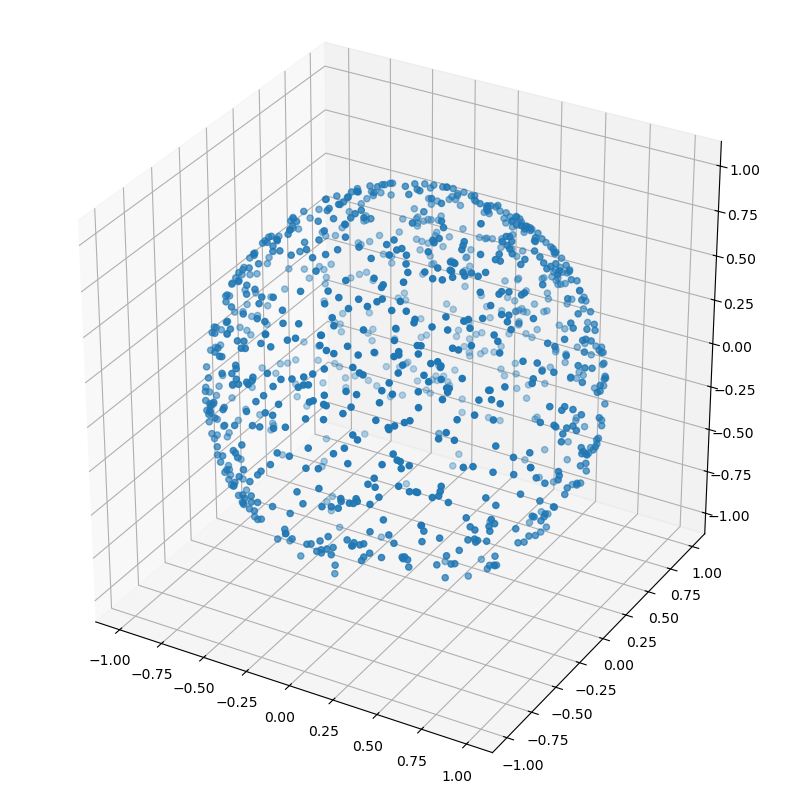

In [6]:
# 3D scatter plot of the stars
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stars[:, 0], stars[:, 1], stars[:, 2])
# make square aspect ratio
ax.set_box_aspect([1,1,1])

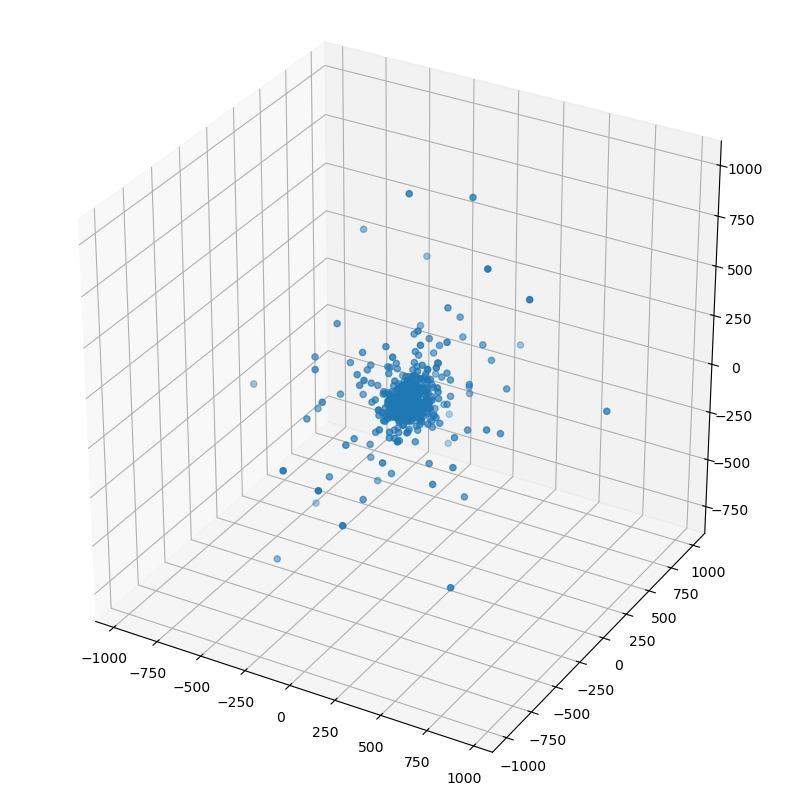

In [7]:
# 3D scatter plot of the stars
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stars_3d[:, 0], stars_3d[:, 1], stars_3d[:, 2])
# make square aspect ratio
ax.set_box_aspect([1,1,1])

In [8]:
def apparent_magnitude_to_flux(magnitudes):
    """
    Convert an array of apparent magnitudes to a linear flux scale.

    Parameters:
    magnitudes (array-like): A list or array of apparent magnitudes.

    Returns:
    numpy.ndarray: An array of flux values corresponding to the input magnitudes.
    """
    # Convert magnitudes to flux using the formula F = 10^(-m/2.5)
    fluxes = 10 ** (-np.array(magnitudes) / 2.5)
    return fluxes

In [9]:
flux = apparent_magnitude_to_flux(df['Vmag'])

stars_3d_mag_flux = np.hstack([stars_3d, df['Vmag'].values[..., None], flux[...,None]])

stars_3d_mag_flux = stars_3d_mag_flux[~np.isinf(stars_3d[:,0])]
stars = stars[~np.isinf(stars_3d[:,0])]

In [10]:
stars.shape, stars_3d_mag_flux.shape

((984, 3), (984, 5))

In [11]:
# export star map
np.savetxt('../visible_stars.csv', stars, delimiter=',', header='X,Y,Z', fmt='%.18f')
np.savetxt('../visible_stars_3dloc_mag_flux.csv', stars_3d_mag_flux, 
           delimiter=',', header='X,Y,Z,MAG,FLUX', fmt='%.18f')

In [12]:
stars

array([[ 0.99477298,  0.02316084, -0.09945   ],
       [ 0.87326712,  0.03197674,  0.48619134],
       [ 0.51238525,  0.020531  ,  0.85851024],
       ...,
       [ 0.99282954, -0.00298189,  0.1195015 ],
       [ 0.99445965,  0.00850494, -0.10477436],
       [ 0.98303519,  0.01931148, -0.1823976 ]])

In [13]:
np.loadtxt('../visible_stars.csv', delimiter=',')

array([[ 0.99477298,  0.02316084, -0.09945   ],
       [ 0.87326712,  0.03197674,  0.48619134],
       [ 0.51238525,  0.020531  ,  0.85851024],
       ...,
       [ 0.99282954, -0.00298189,  0.1195015 ],
       [ 0.99445965,  0.00850494, -0.10477436],
       [ 0.98303519,  0.01931148, -0.1823976 ]])